In [1]:
!nvidia-smi

Tue Jan  9 08:08:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

##**Installing Libraries**

In [2]:
# Reloads the autoreload extension to automatically reload modules before code execution
%reload_ext autoreload

# Sets autoreload to the most aggressive mode (reload all modules, both from import statements and interactive use)
%autoreload 2

# Ensures that Matplotlib visualizations are displayed directly in the notebook cells
%matplotlib inline

In [3]:
# Upgrades the specified Python packages to their latest versions using pip with the -Uqq (upgrade, quiet) options
!pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [4]:
# Importing necessary libraries and modules

import torch

from transformers import AutoModelForSequenceClassification, AutoConfig
from transformers import TrainingArguments, Trainer
from transformers import AutoTokenizer

from fastai.text.all import *

from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for squad contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/squad/squad.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [5]:
# Mounting Google Drive and specifying the mount point as '/content/drive'

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Pointing directory

%cd /content/drive/MyDrive/Datasets/NLP_Project

/content/drive/MyDrive/Datasets/NLP_Project


In [7]:
# Reading a CSV file named "movie_data.csv" into a Pandas DataFrame
df = pd.read_csv("movie_data.csv")

# Displaying the first few rows of the DataFrame using the head() method
df.head()

,Title,Description,Genres
0,Rebel Moon: Part One - A Child of Fire,"When a peaceful settlement on the edge of a distant moon finds itself threatened by the armies of a tyrannical ruling force, a mysterious stranger living among its villagers becomes their best hope for survival.","Action, Adventure, Drama"
1,Saltburn,"A student at Oxford University finds himself drawn into the world of a charming and aristocratic classmate, who invites him to his eccentric family's sprawling estate for a summer never to be forgotten.","Comedy, Drama, Thriller"
2,Leave the World Behind,"A family's getaway to a luxurious rental home takes an ominous turn when a cyberattack knocks out their devices, and two strangers appear at their door.","Drama, Mystery, Thriller"
3,Wonka,"With dreams of opening a shop in a city renowned for its chocolate, a young and poor Willy Wonka discovers that the industry is run by a cartel of greedy chocolatiers.","Adventure, Comedy, Family"
4,Aquaman and the Lost Kingdom,"Black Manta seeks revenge on Aquaman for his father's death. Wielding the Black Trident's power, he becomes a formidable foe. To defend Atlantis, Aquaman forges an alliance with his imprisoned brother. They must protect the kingdom.","Action, Adventure, Fantasy"


In [8]:
# Displaying the shape (number of rows and columns) of the DataFrame
df.shape

(13001, 3)

##**Data Cleaning and Pre-processing**

In [9]:
# Checking and displaying the number of missing values in each column of the DataFrame
df.isnull().sum()

Title          12
Description    19
Genres          9
dtype: int64

In [10]:
df = df.dropna().reset_index(drop=True)
df.shape

(12982, 3)

In [11]:
# Checking for and displaying duplicated rows in the DataFrame
print('Count of duplicates =', df.duplicated().sum())

# Dropping duplicated rows and resetting the index of the DataFrame
df = df.drop_duplicates().reset_index(drop=True)

# Displaying the updated shape of the DataFrame after dropping duplicates
df.shape

Count of duplicates = 108


(12874, 3)

In [12]:
# Extracting the 'Genres' column from the DataFrame and converting it to a list
genres_list = df['Genres'].tolist()

# Cleaning and processing the genres list
cleaned_genres_list = []
for genres in genres_list:
    # Stripping leading and trailing whitespaces, and replacing '-' with ''
    genre_list = [genre.strip().replace('-', '') for genre in genres.split(',')]

    # Handling special case for 'Sci-fi' genre
    genre_list = ['Sci-fi' if genre.lower() == 'sci' or genre.lower() == 'fi' else genre for genre in genre_list]

    # Joining the cleaned genre list back to a string and appending to the cleaned_genres_list
    cleaned_genres_list.append(', '.join(genre_list))

# Updating the 'genres' column in the DataFrame with the cleaned_genres_list
df['genres'] = cleaned_genres_list

In [13]:
# Dropping the 'Genres' column from the DataFrame in-place
df.drop(columns=['Genres'], inplace=True)

**Data Check**

In [14]:
# Counting the occurrences of each genre in the cleaned_genres_list
genre_count = {}

for genres in cleaned_genres_list:
    genre_list = [genre.strip() for genre in genres.split(',')]
    for genre in genre_list:
        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1

# Displaying the number of unique genres and the count of each genre
print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

Number of Genres: 23
{'Action': 2946, 'Adventure': 2113, 'Drama': 6875, 'Comedy': 4367, 'Thriller': 2232, 'Mystery': 1308, 'Family': 766, 'Fantasy': 962, 'Romance': 2140, 'Biography': 807, 'History': 441, 'Sport': 252, 'Crime': 2222, 'Musical': 200, 'Sci-fi': 1816, 'Horror': 1816, 'Animation': 565, 'Music': 352, 'War': 259, 'Documentary': 192, 'Western': 176, 'Film': 52, 'Noir': 52}


In [15]:
# Setting a threshold to identify rare genres based on their occurrence count
threshold = int(len(df) * 0.01)

# Filtering out genres that occur less frequently than the threshold
rare_genres = [key for key, value in genre_count.items() if value < threshold]

# Displaying the number of rare genres and the first 5 rare genres
len(rare_genres), rare_genres[:5]

(2, ['Film', 'Noir'])

In [16]:
# Filtering out rare genres from the 'genres' column in the DataFrame
genres_list = df.genres.to_list()
revised_genre_list = []
indices_to_drop = []

for idx, genres in enumerate(genres_list):
    genre_list = [genre.strip() for genre in genres.split(',')]
    revised_genres = []

    for genre in genre_list:
        if genre not in rare_genres:
            revised_genres.append(genre)

    if len(revised_genres) == 0:
        indices_to_drop.append(idx)
    else:
        revised_genre_list.append(revised_genres)

# Dropping rows with no remaining genres and resetting the index of the DataFrame
df = df.drop(indices_to_drop).reset_index(drop=True)

# Displaying the updated shape of the DataFrame after filtering out rare genres
df.shape

(12874, 3)

In [17]:
# Adding a new column 'revised_genres' to the DataFrame with the filtered genre lists
df['revised_genres'] = revised_genre_list

In [18]:
# Displaying the last 2 rows of the DataFrame
df.tail(2)

,Title,Description,genres,revised_genres
12872,Jackass Number Two,"Chris Pontius, Johnny Knoxville, Steve-O, Bam Margera, and the whole crew return to the screen to raise the stakes higher than ever before.","Documentary, Action, Comedy","[Documentary, Action, Comedy]"
12873,"Oh, God!","When God appears to an assistant grocery manager as a good natured old man, the Almighty selects him as his messenger for the modern world.","Comedy, Fantasy","[Comedy, Fantasy]"


In [19]:
# Counting the occurrences of each genre in the revised_genres_list
revised_genres_list = df.revised_genres.to_list()
revised_genre_count = {}

for genres in revised_genres_list:
    genre_list = genres
    for genre in genre_list:
        if genre in revised_genre_count.keys():
            revised_genre_count[genre] += 1
        else:
            revised_genre_count[genre] = 1

# Displaying the number of unique genres and the count of each genre in the revised_genres_list
print(f"Number of Genres: {len(revised_genre_count)}")
print(revised_genre_count)

Number of Genres: 21
{'Action': 2946, 'Adventure': 2113, 'Drama': 6875, 'Comedy': 4367, 'Thriller': 2232, 'Mystery': 1308, 'Family': 766, 'Fantasy': 962, 'Romance': 2140, 'Biography': 807, 'History': 441, 'Sport': 252, 'Crime': 2222, 'Musical': 200, 'Sci-fi': 1816, 'Horror': 1816, 'Animation': 565, 'Music': 352, 'War': 259, 'Documentary': 192, 'Western': 176}


In [21]:
# Creating a dictionary to encode genre types with their corresponding indices
encode_genre_types = {key: idx for idx, (key, value) in enumerate(revised_genre_count.items())}

# Writing the encoded genre types dictionary to a JSON file named "genre_types_encoded.json"
with open("genre_types_encoded.json", "w") as fp:
    json.dump(encode_genre_types, fp)

In [22]:
# Creating a list of categorical representations for genres based on the encoded genre types
categorical_genre_list = []
revised_genres_list = df.revised_genres.to_list()

for revised_genres in revised_genres_list:
    categorical_list = [0] * len(encode_genre_types)
    for genre in revised_genres:
        genre_type_index = encode_genre_types[genre]
        categorical_list[genre_type_index] = 1
    categorical_genre_list.append(categorical_list)

# Displaying the first 23 elements of the categorical representation of genres for the 4th row
categorical_genre_list[3][:23]

[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
# Adding a new column 'genre_cat_list' to the DataFrame with the categorical representation of genres
df['genre_cat_list'] = categorical_genre_list

# Displaying the first 2 rows of the updated DataFrame
df.head(2)

,Title,Description,genres,revised_genres,genre_cat_list
0,Rebel Moon: Part One - A Child of Fire,"When a peaceful settlement on the edge of a distant moon finds itself threatened by the armies of a tyrannical ruling force, a mysterious stranger living among its villagers becomes their best hope for survival.","Action, Adventure, Drama","[Action, Adventure, Drama]","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,Saltburn,"A student at Oxford University finds himself drawn into the world of a charming and aristocratic classmate, who invites him to his eccentric family's sprawling estate for a summer never to be forgotten.","Comedy, Drama, Thriller","[Comedy, Drama, Thriller]","[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


##**Multi-Label Text Classification**

###**DataLoaders and Modeling**

In [24]:
# Creating a list of labels from the encoded genre types
labels = list(encode_genre_types.keys())

In [25]:
# Setting up the configuration for the Hugging Face model for multi-label classification
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

# Retrieving Hugging Face objects (architecture, configuration, tokenizer, and model)
hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)

# Configuring the problem type for multi-label classification
hf_model.config.problem_type = "multi_label_classification"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

In [26]:
# Defining data blocks for multi-label text classification using Hugging Face model
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True, vocab=labels))

# Creating a data block for processing text data and multi-label targets
dblock = DataBlock(
    blocks=blocks,
    get_x=ColReader('Description'),
    get_y=ColReader('genre_cat_list'),
    splitter=RandomSplitter(valid_pct=0.1, seed=42)
)

In [28]:
# Creating dataloaders from the data block for training and validation
dls = dblock.dataloaders(df, bs=32)

# Saving the dataloaders to a file using torch.save
torch.save(dls, "dataloaders/dls-multilabel-movie_genre-classifier.pkl")

In [29]:
# Accessing the vocabulary of the dataloaders
dls.vocab

['Action', 'Adventure', 'Drama', 'Comedy', 'Thriller', 'Mystery', 'Family', 'Fantasy', 'Romance', 'Biography', 'History', 'Sport', 'Crime', 'Musical', 'Sci-fi', 'Horror', 'Animation', 'Music', 'War', 'Documentary', 'Western']

In [30]:
# Displaying a batch of data samples from the dataloaders
dls.show_batch(dataloaders=dls, max_n=3, trunc_at=512)

,text,target
0,"In a small village in Jharkhand, India, Ranjit wakes up to find that his 13-year-old daughter has not returned home from a family wedding. Calls are made, a search ensues, and a few hours later, she's found stumbling home. After having been dragged into the woods, she was sexually assaulted by three men, all of whom are known to the family. Ranjit and his wife go to the police, and the men are arrested. But the family's relief is short-lived when the villagers and their leaders launch a sustained campaign",[Documentary]
1,"The Redneg takes place in the near future, in a fallen world after a devastating world war between woman and man. Only one percent of the world's population has survived the war and most of them are women. The few surviving men are being killed or captured by female groups, driven by the vision and the determination to build a new world, ruled only by women. Due to the decay of civilization, the survivors from around the world seek new beginnings in the woods up north in Scandinavia. In this extraordinary","[Action, Adventure, Drama]"
2,"Laura has been with Antonio all her life and, just when she begins to wonder if that is really the life she wants, Sergio and Siena cross paths in their lives. Sergio is a former high school classmate and Siena, his millennial girlfriend who arrives to revolutionize everyone's lives. Laura, Raquel and Cris, close friends for years, convince their respective husbands to play a game that Siena proposes to them: the game of keys. The game consists of everyone putting their keys in a bowl. At random, each one",[Comedy]


In [31]:
# Creating a learner for training the model using fastai
model = BaseModelWrapper(hf_model)

# Defining accuracy metric for multi-label classification with a specified threshold
acc = partial(accuracy_multi, thresh=0.2)

# Setting up the learner with appropriate configurations
learner = Learner(
    dls,
    model,
    opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
    loss_func=BCEWithLogitsLossFlat(),
    metrics=[acc],
    cbs=[BaseModelCallback],
    splitter=blurr_splitter
).to_fp16()

**Stage 0**

In [32]:
# Freezing the model's parameters for transfer learning
learner.freeze()

SuggestedLRs(slide=0.0008317637839354575, valley=0.00019054606673307717)

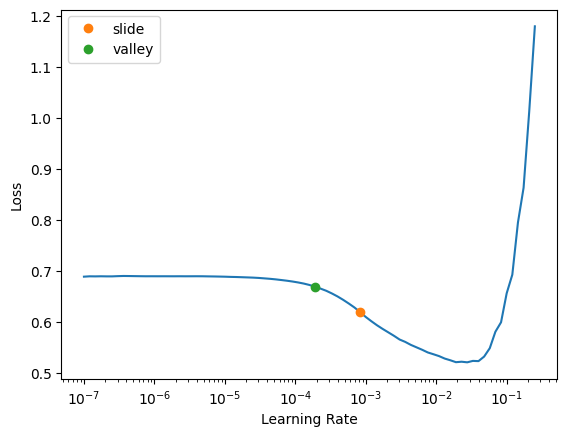

In [33]:
# Finding an appropriate learning rate using the LR Finder with suggested functions for slide and valley
learner.lr_find(suggest_funcs=[slide, valley])

In [34]:
# Training the model for one cycle with a specified learning rate
learner.fit_one_cycle(3, lr_max=1.9e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.246309,0.226275,0.865320,00:22
1,0.212170,0.207774,0.879195,00:24
2,0.207422,0.205244,0.879787,00:22


In [35]:
# Saving the learner's model weights and state to a file
learner.save("multi-movie_genre-classifier-stage-0")

Path('models/multi-movie_genre-classifier-stage-0.pth')

In [36]:
# Exporting the learner's model and related state to a file
learner.export("models/multi-movie_genre-classifier-stage-0.pkl")

**Stage 1**

In [37]:
# Unfreezing the model's parameters for further training
learner.unfreeze()

SuggestedLRs(slide=0.002511886414140463, valley=5.754399353463668e-06)

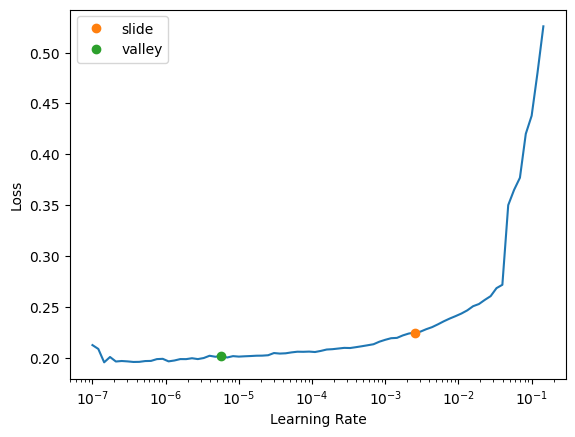

In [38]:
learner.lr_find(suggest_funcs=[slide, valley])

In [39]:
learner.fit_one_cycle(8,slice(2.6e-3, 2.3e-5))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.213264,0.208018,0.878085,00:36
1,0.213834,0.219500,0.874089,00:38
2,0.171673,0.231775,0.874533,00:37
3,0.132333,0.242010,0.879269,00:37
4,0.086570,0.258996,0.890036,00:38
5,0.054718,0.270304,0.889111,00:37
6,0.035984,0.277719,0.889925,00:38
7,0.032624,0.279582,0.890369,00:37


In [40]:
learner.save("multi-movie_genre-classifier-stage-1")

Path('models/multi-movie_genre-classifier-stage-1.pth')

In [41]:
learner.export("models/multi-movie_genre-classifier-stage--1.pkl")

**Stage 2**

In [42]:
# Freezing all layers except the last two layer groups for transfer learning
learner.freeze_to(-2)

SuggestedLRs(slide=0.00013182566908653826, valley=6.30957365501672e-05)

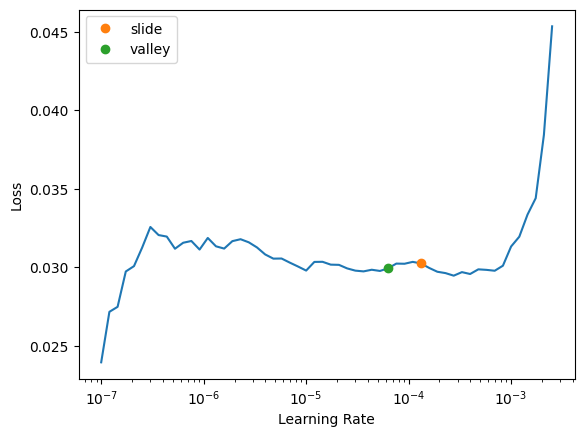

In [43]:
learner.lr_find(suggest_funcs=(slide, valley))

In [44]:
learner.fit_one_cycle(4, 3.3e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.064511,0.399038,0.874052,00:39
1,0.040159,0.417004,0.892626,00:36
2,0.018025,0.451108,0.891146,00:37
3,0.011889,0.457149,0.893144,00:35


In [ ]:
learner.save("multi-movie_genre-classifier-stage-2")

Path('models/multi-movie_genre-classifier-stage-2.pth')

In [ ]:
learner.export("models/multi-movie_genre-classifier-stage-2.pkl")

**Stage 3**

In [45]:
learner.unfreeze()

SuggestedLRs(slide=9.120108734350652e-05, valley=3.630780702224001e-05)

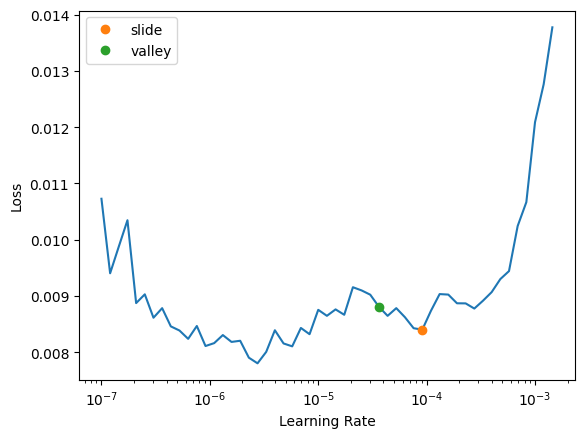

In [46]:
learner.lr_find(suggest_funcs=[slide, valley])

In [47]:
learner.fit_one_cycle(8,slice(4.4e-5, 3.8e-5))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.010891,0.462006,0.893773,00:37
1,0.011421,0.486113,0.893551,00:37
2,0.009335,0.504015,0.891183,00:37
3,0.005182,0.518902,0.893440,00:39
4,0.004221,0.526126,0.895031,00:37
5,0.003957,0.535520,0.893995,00:38
6,0.003143,0.536022,0.894994,00:37
7,0.004858,0.537116,0.894291,00:37


In [ ]:
learner.save("multi-movie_genre-classifier-stage-3")

In [ ]:
learner.export("models/multi-movie_genre-classifier-stage-3.pkl")

**Stage 4**

In [48]:
learner.freeze_to(-3)

In [49]:
learner.fit_one_cycle(7 ,slice(4.9e-6, 5.1e-5))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.002754,0.546728,0.894439,00:37
1,0.004336,0.568406,0.896659,00:38
2,0.002260,0.591490,0.894550,00:36
3,0.001753,0.602954,0.894772,00:38
4,0.002707,0.611317,0.895623,00:37
5,0.001860,0.612906,0.895438,00:37
6,0.004538,0.613423,0.895697,00:38


In [ ]:
learner.save("multi-movie_genre-classifier-stage-4")

In [ ]:
learner.export("models/multi-movie_genre-classifier-stage-4.pkl")

**Stage 5**

In [50]:
learner.unfreeze()

SuggestedLRs(slide=3.311311274956097e-06, valley=1.4454397387453355e-05)

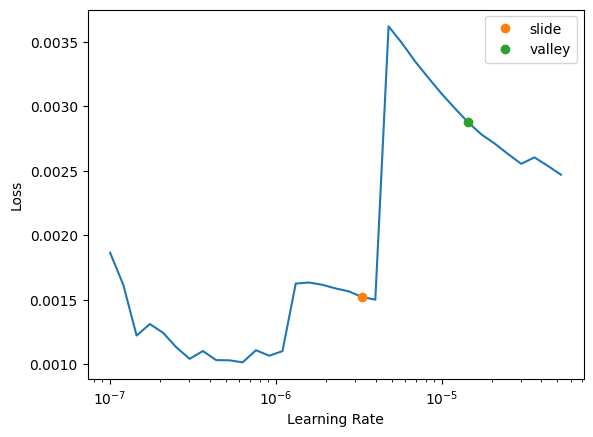

In [51]:
learner.lr_find(suggest_funcs=[slide, valley])

In [52]:
learner.fit_one_cycle(7 ,slice(2.9e-6, 1.6e-5))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.001550,0.617050,0.895475,00:39
1,0.001639,0.622942,0.894994,00:38
2,0.001740,0.629262,0.895845,00:39
3,0.001126,0.632736,0.896215,00:37
4,0.001921,0.635336,0.895364,00:40
5,0.001794,0.634567,0.896326,00:38
6,0.002917,0.634586,0.896474,00:40


In [53]:
learner.save("multi-movie_genre-classifier-stage-5")

Path('models/multi-movie_genre-classifier-stage-5.pth')

In [54]:
learner.export("models/multi-movie_genre-classifier-stage-5.pkl")

#**Text Classification with HuggingFace Transformers**

##**Data Processing**

In [55]:
from datasets import Dataset, DatasetDict
ds = Dataset.from_pandas(df)

In [56]:
ds

Dataset({
    features: ['Title', 'Description', 'genres', 'revised_genres', 'genre_cat_list'],
    num_rows: 12874
})

In [57]:
ds[0]

{'Title': 'Rebel Moon: Part One - A Child of Fire',
 'Description': 'When a peaceful settlement on the edge of a distant moon finds itself threatened by the armies of a tyrannical ruling force, a mysterious stranger living among its villagers becomes their best hope for survival.',
 'genres': 'Action, Adventure, Drama',
 'revised_genres': ['Action', 'Adventure', 'Drama'],
 'genre_cat_list': [1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]}

**Tokenization**

In [58]:
model_name = "distilroberta-base"

In [59]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [60]:
tokenizer.tokenize(ds[0]['Description'][:150])

['When',
 'Ġa',
 'Ġpeaceful',
 'Ġsettlement',
 'Ġon',
 'Ġthe',
 'Ġedge',
 'Ġof',
 'Ġa',
 'Ġdistant',
 'Ġmoon',
 'Ġfinds',
 'Ġitself',
 'Ġthreatened',
 'Ġby',
 'Ġthe',
 'Ġarmies',
 'Ġof',
 'Ġa',
 'Ġtyrann',
 'ical',
 'Ġruling',
 'Ġforce',
 ',',
 'Ġa',
 'Ġmysterious',
 'Ġstranger',
 'Ġliv']

In [61]:
tokenizer(ds[0]['Description'][:150])

{'input_ids': [0, 1779, 10, 7053, 4221, 15, 5, 3543, 9, 10, 13258, 6950, 5684, 1495, 3711, 30, 5, 33462, 9, 10, 43450, 3569, 2255, 1370, 6, 10, 12754, 12443, 32126, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [62]:
def tokenize_desc(x) :
  return tokenizer(x['Description'], truncation=True, padding=True)

In [63]:
tokenized_ds = ds.map(tokenize_desc, batched=True)

Map:   0%|          | 0/12874 [00:00<?, ? examples/s]

In [64]:
tokenized_ds[0]

{'Title': 'Rebel Moon: Part One - A Child of Fire',
 'Description': 'When a peaceful settlement on the edge of a distant moon finds itself threatened by the armies of a tyrannical ruling force, a mysterious stranger living among its villagers becomes their best hope for survival.',
 'genres': 'Action, Adventure, Drama',
 'revised_genres': ['Action', 'Adventure', 'Drama'],
 'genre_cat_list': [1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'input_ids': [0,
  1779,
  10,
  7053,
  4221,
  15,
  5,
  3543,
  9,
  10,
  13258,
  6950,
  5684,
  1495,
  3711,
  30,
  5,
  33462,
  9,
  10,
  43450,
  3569,
  2255,
  1370,
  6,
  10,
  12754,
  12443,
  1207,
  566,
  63,
  17603,
  3374,
  49,
  275,
  1034,
  13,
  7967,
  4,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  

In [65]:
row = tokenized_ds[0]
row['Description'], row['input_ids']

('When a peaceful settlement on the edge of a distant moon finds itself threatened by the armies of a tyrannical ruling force, a mysterious stranger living among its villagers becomes their best hope for survival.',
 [0,
  1779,
  10,
  7053,
  4221,
  15,
  5,
  3543,
  9,
  10,
  13258,
  6950,
  5684,
  1495,
  3711,
  30,
  5,
  33462,
  9,
  10,
  43450,
  3569,
  2255,
  1370,
  6,
  10,
  12754,
  12443,
  1207,
  566,
  63,
  17603,
  3374,
  49,
  275,
  1034,
  13,
  7967,
  4,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1])

In [66]:
# Vocabulary index, Numericalization like we did in ULMFit
tokenizer.vocab['Ġpeaceful']

7053

**Categorize**

In [67]:
labels = list(encode_genre_types.keys())
label_count = len(labels)
labels, label_count

(['Action',
  'Adventure',
  'Drama',
  'Comedy',
  'Thriller',
  'Mystery',
  'Family',
  'Fantasy',
  'Romance',
  'Biography',
  'History',
  'Sport',
  'Crime',
  'Musical',
  'Sci-fi',
  'Horror',
  'Animation',
  'Music',
  'War',
  'Documentary',
  'Western'],
 21)

In [68]:
labels.index('Fantasy')

7

In [69]:
def categorize(x):
    return {"labels": x['genre_cat_list']}

In [70]:
categorized_ds = tokenized_ds.map(categorize, batched=True)
categorized_ds

Map:   0%|          | 0/12874 [00:00<?, ? examples/s]

Dataset({
    features: ['Title', 'Description', 'genres', 'revised_genres', 'genre_cat_list', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 12874
})

In [71]:
categorized_ds[1]

{'Title': 'Saltburn',
 'Description': "A student at Oxford University finds himself drawn into the world of a charming and aristocratic classmate, who invites him to his eccentric family's sprawling estate for a summer never to be forgotten.",
 'genres': 'Comedy, Drama, Thriller',
 'revised_genres': ['Comedy', 'Drama', 'Thriller'],
 'genre_cat_list': [0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'input_ids': [0,
  250,
  1294,
  23,
  9238,
  589,
  5684,
  1003,
  4777,
  88,
  5,
  232,
  9,
  10,
  18452,
  8,
  38939,
  23337,
  27862,
  6,
  54,
  19101,
  123,
  7,
  39,
  29555,
  284,
  18,
  16322,
  2587,
  13,
  10,
  1035,
  393,
  7,
  28,
  9885,
  4,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  

In [72]:
row = categorized_ds[1]
row['labels']

[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

**Data Splitting**

In [73]:
split_ds = categorized_ds.train_test_split(0.1, seed=42)
split_ds

DatasetDict({
    train: Dataset({
        features: ['Title', 'Description', 'genres', 'revised_genres', 'genre_cat_list', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 11586
    })
    test: Dataset({
        features: ['Title', 'Description', 'genres', 'revised_genres', 'genre_cat_list', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1288
    })
})

##**Hugging Face Modeling**

In [76]:
!pip install -q transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 2.2 MB/s eta 0:00:00


In [ ]:
!pip install -Uqq accelerate

In [74]:
bs = 32
epochs = 7
lr = 4.11e-4

In [77]:
args = TrainingArguments(
    "models",
    learning_rate = lr,
    warmup_ratio = 0.1,
    lr_scheduler_type='cosine',
    fp16=True,
    evaluation_strategy='epoch',
    per_device_train_batch_size=bs,
    per_device_eval_batch_size=bs,
    num_train_epochs=epochs,
    weight_decay=0.01,
    report_to='none',
    # save_steps=200,
    # save_strategy='epochs'
)

ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.20.1`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=label_count)
model

In [ ]:
!pip install evaluate

In [ ]:
import evaluate
import numpy as np
def accuracy(eval_preds):
  metric = evaluate.load("accuracy")
  logits, labels = eval_preds
  predictions = np.argmax(logits, axis=-1)
  return metric.compute(predictions=predictions, references=labels)

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset = split_ds['train'],
    eval_dataset = split_ds['test'],
    tokenizer = tokenizer,
    compute_metrics = accuracy
)

In [ ]:
trainer.train()

In [ ]:
trainer.save_model('models/hugging_face-movie_genre-classifier')

#**Text Classification with Blurr**

In [ ]:
labels = list(encode_genre_types.keys())
label_count= len(labels)
print(label_count)

In [ ]:
model_cls = AutoModelForSequenceClassification

model_name = "distilroberta-base"

config = AutoConfig.from_pretrained(model_name)
config.num_labels = label_count

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), CategoryBlock)
dblock = DataBlock(blocks=blocks, get_x=ColReader('Description'), get_y=ColReader('genre_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs=32)
# torch.save(dls, "dataloaders/dls-movie_genre-classifier-blurr.pkl")

In [ ]:
# dls = torch.load("dataloaders/dls-movie_genre-classifier.pkl")

In [ ]:
dls.show_batch(dataloaders=dls, max_n=3, trunc_at=500)

In [ ]:
model = BaseModelWrapper(hf_model)

learner = Learner(
                dls,
                model,
                opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                loss_func=PreCalculatedCrossEntropyLoss(),  # CrossEntropyLossFlat(),
                metrics=[accuracy],
                cbs=[BaseModelCallback],
                splitter=blurr_splitter,
            ).to_fp16()

In [ ]:
learner.model

**Stage 0**

In [ ]:
learner.freeze()

In [ ]:
learner.lr_find(suggest_funcs=[minimum, steep])

In [ ]:
learner.fit_one_cycle(7, 1.7e-3)

In [ ]:
learner.save("blurr-movie_genre-classifier-stage-0")

In [ ]:
learner.export("models/blurr-movie_genre-classifier-stage-0.pkl")

**Stage 1**

In [ ]:
# learner.load("blurr-movie_genre-classifier-stage-0")

In [ ]:
learner.unfreeze()

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(5, slice(5e-4, 2e-05))

In [ ]:
learner.save("blurr-movie_genre-classifier-stage-1")